### 構造修飾プログラム

In [1]:
import numpy as np

import rdkit
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw.MolDrawing import DrawingOptions

## フラグメントを追加する関数

In [2]:
def to_mol(rdmol): # RWMol オブジェクトをMolオブジェクトに戻す
    return Chem.MolFromSmiles(Chem.MolToSmiles(Chem.Mol(rdmol)))

In [3]:
def add_fragment(origin, ix_o, fragment, ix_f):
    editable = Chem.RWMol(origin) # RWMolに変換
    n_atoms = len(editable.GetAtoms())
    for a in fragment.GetAtoms():
        editable.AddAtom(Chem.Atom(a.GetAtomicNum()))
    
    bonds = list(zip(*np.where(Chem.GetAdjacencyMatrix(fragment))))
    for i, j in bonds:
        i = int(i); j = int(j)
        if i < j:
            bond = fragment.GetBondBetweenAtoms(i, j) # 追加fragment内の結合情報を取得
            editable.AddBond(i + n_atoms, j + n_atoms, bond.GetBondType()) # 追加したfragment内をつなぎ直す
    
    editable.AddBond(ix_o, n_atoms + ix_f, Chem.BondType.SINGLE) # 追加したfragmentと元の構造を単結合で繋ぐ
    return to_mol(editable)

## 分子の可視化関数

In [4]:
def molview(mole):
    DrawingOptions.includeAtomNumbers = True # old! not work RDKit 2020.03~
    view = Chem.Draw.MolToImage(mole, includeAtomNumbers = True)
    DrawingOptions.includeAtomNumbers = False # old! not work RDKit 2020.03~
    return view

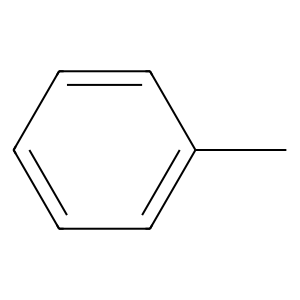

In [5]:
toluene = Chem.MolFromSmiles('Cc1ccccc1')
molview(toluene)

In [6]:
def new_molview(mole):
    for atom in mole.GetAtoms():
        atom.SetProp('atomLabel',str(atom.GetIdx()))
    view = Chem.Draw.MolToImage(mole)
    return view

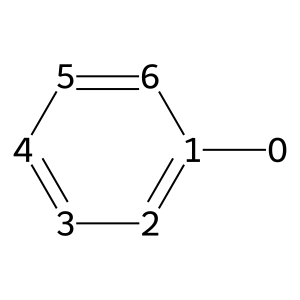

In [7]:
new_molview(toluene)

## 分子の結合

In [8]:
benzene = Chem.MolFromSmiles('c1ccccc1')

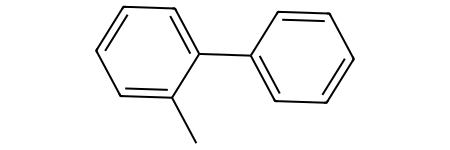

In [9]:
add_fragment(toluene, 2, benzene, 0) # オルト

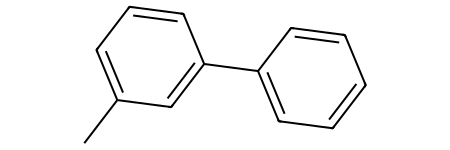

In [10]:
add_fragment(toluene, 3, benzene, 0) # メタ

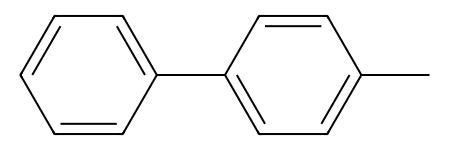

In [11]:
add_fragment(toluene, 4, benzene, 0) # パラ